In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('star_classification.csv')
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [4]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

## Column Descriptions
1. **obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
1. **alpha** = Right Ascension angle (at J2000 epoch)
1. **delta** = Declination angle (at J2000 epoch)
1. **u** = Ultraviolet filter in the photometric system
1. **g** = Green filter in the photometric system
1. **r** = Red filter in the photometric system
1. **i** = Near Infrared filter in the photometric system
1. **z** = Infrared filter in the photometric system
1. **run_ID** = Run Number used to identify the specific scan
1. **rerun_ID** = Rerun Number to specify how the image was processed
1. **cam_col** = Camera column to identify the scanline within the run
1. **field_ID** = Field number to identify each field
1. **spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
1. **class** = object class (galaxy, star or quasar object)
1. **redshift** = redshift value based on the increase in wavelength
1. **plate** = plate ID, identifies each plate in SDSS
1. **MJD** = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
1. **fiber_ID** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [5]:
# create 
le = LabelEncoder()
y = data['class'].copy()
y_encoded = le.fit_transform(y)
y_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
y.value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [7]:
y_encoded[:20]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0])

In [8]:
predictor_cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift']
X = data[predictor_cols].copy()
X.head()

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123


In [9]:
X.describe()

,alpha,delta,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [10]:
# train test split without scaling or resampling

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, random_state=111)

In [11]:
# decision tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train_encoded)
print(f"Training Data Score: {tree_model.score(X_train, y_train_encoded)}")
print(f"Testing Data Score: {tree_model.score(X_test, y_test_encoded)}")

Training Data Score: 1.0
Testing Data Score: 0.96336


In [12]:
# gradient boost
gb_model = GradientBoostingClassifier(random_state=42).fit(X_train, y_train_encoded)
print(f"Training Data Score: {gb_model.score(X_train, y_train_encoded)}")
print(f"Testing Data Score: {gb_model.score(X_test, y_test_encoded)}")

Training Data Score: 0.977
Testing Data Score: 0.97504


In [13]:
# adaboost forest
adb_model = AdaBoostClassifier(random_state=111).fit(X_train, y_train_encoded)
print(f"Training Data Score: {adb_model.score(X_train, y_train_encoded)}")
print(f"Testing Data Score: {adb_model.score(X_test, y_test_encoded)}")

/Users/justified/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Data Score: 0.789
Testing Data Score: 0.78952


In [14]:
# svm
# sv_model = SVC(kernel='rbf')
# sv_model.fit(X_train, y_train_encoded)

In [15]:
model_scores = pd.DataFrame()
def build_model_scores_df(name, trainacc, testacc):
    model_scores[name] = {'Train':trainacc, 'Test':testacc, 'Gap': trainacc-testacc}

In [16]:
models = {
        # 'Logistic':lr_model,
        # 'SVM':sv_model,
        # 'KNN':knn_model,
        'DecisionTree':tree_model,
        # 'RandomForest':rf_model,
        'GradientBoost':gb_model,
        'AdaBoost':adb_model
    }

In [17]:
for name in models:
    train_accuracy = models[name].score(X_train, y_train_encoded)
    test_accuracy = models[name].score(X_test, y_test_encoded)
    print('Train Accuracy: %.3f' % train_accuracy)
    # print('Test Accuracy: %.3f' % test_accuracy)
    build_model_scores_df(name, train_accuracy, test_accuracy)
model_scores

Train Accuracy: 1.000
Train Accuracy: 0.977
Train Accuracy: 0.789


,DecisionTree,GradientBoost,AdaBoost
Train,1.00000,0.97700,0.78900
Test,0.96336,0.97504,0.78952
Gap,0.03664,0.00196,-0.00052


In [18]:
def knn_optimization(X_train, X_test, y_train, y_test, description):
    # knn
    train_scores = []
    test_scores = []
    for i in range(1,20,2):
        # create knn model
        knn_model = KNeighborsClassifier(n_neighbors=i)
        # fit model
        knn_model.fit(X_train, y_train)
        # generate score metrics
        train_score = knn_model.score(X_train, y_train)
        test_score = knn_model.score(X_test, y_test)
        # add to dataframe
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f"Training/Test Score, k = {i} : {train_score}/{test_score}")

    # Plot the results
    plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
    plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
    plt.xlabel("k neighbors")
    plt.ylabel("accuracy score")
    plt.title(f'KNN Optimization on {description} Data')
    plt.xticks(range(1,20,2))
    plt.legend()
    plt.show()


def rf_optimization(X_train, X_test, y_train, y_test, description):
    # random forest
    estimators = [4,8,16,32, 64, 128, 256]
    depths = [3,9, 27, 81]

    # dataframe
    rf_df = pd.DataFrame(columns=estimators,index=depths)
    # check various estimator and depth values
    for i in estimators:
        print(f"{i} estimators, {description} data...")
        for j in depths:
            # create model
            rf_model = RandomForestClassifier(random_state=111, max_depth=j, n_estimators=i)
            # fit model
            rf_model.fit(X_train, y_train)
            # generate score metrics
            train_score = rf_model.score(X_train, y_train)
            test_score = rf_model.score(X_test, y_test)

            # print(f"Training ({i} estimators, {j} max depth): {train_score}")
            # print(f"Testing ({i} estimators, {j} max depth): {test_score}")
            # print(f"{i} estimators, {j} max depth, {description} data...")
            # add to dataframe
            rf_df.loc[j,i] = (round(train_score,5),round(test_score,5), round((train_score-test_score),3))#(i,j),

    y_pred = rf_model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    return rf_df

Training/Test Score, k = 1 : 1.0/0.8286
Training/Test Score, k = 3 : 0.90388/0.83556
Training/Test Score, k = 5 : 0.8772533333333333/0.83
Training/Test Score, k = 7 : 0.8621066666666667/0.82668
Training/Test Score, k = 9 : 0.8511866666666666/0.82152
Training/Test Score, k = 11 : 0.8422666666666667/0.81616
Training/Test Score, k = 13 : 0.8352266666666667/0.81228
Training/Test Score, k = 15 : 0.8297333333333333/0.80828
Training/Test Score, k = 17 : 0.82404/0.80404
Training/Test Score, k = 19 : 0.8199733333333333/0.80016


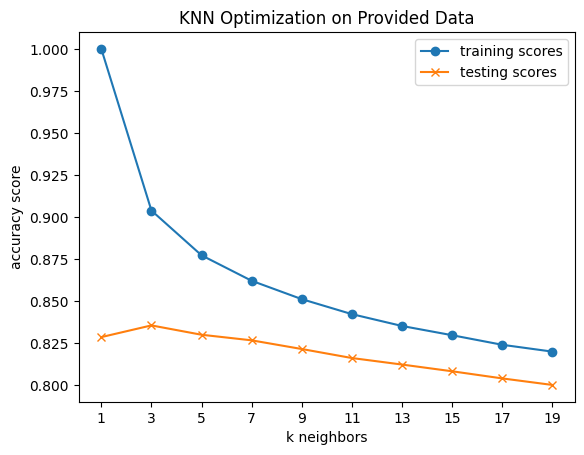

In [19]:
# provided data, no scaling or resampling

knn_optimization(X_train, X_test, y_train_encoded,y_test_encoded, 'Provided')

In [20]:
# random forest

rf_optimization(X_train, X_test, y_train_encoded,y_test_encoded, 'provided')

4 estimators, provided data...
8 estimators, provided data...
16 estimators, provided data...
32 estimators, provided data...
64 estimators, provided data...
128 estimators, provided data...
256 estimators, provided data...
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14731
           1       0.96      0.93      0.95      4747
           2       0.99      1.00      1.00      5522

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.97     25000
weighted avg       0.98      0.98      0.98     25000

[[14530   161    40]
 [  347  4400     0]
 [    4     0  5518]]


,4,8,16,32,64,128,256
3,"(0.74087, 0.73456, 0.006)","(0.77679, 0.7738, 0.003)","(0.87484, 0.87532, -0.0)","(0.93701, 0.93472, 0.002)","(0.94035, 0.93904, 0.001)","(0.93871, 0.9378, 0.001)","(0.93799, 0.93736, 0.001)"
9,"(0.95944, 0.95392, 0.006)","(0.97293, 0.96788, 0.005)","(0.97659, 0.97252, 0.004)","(0.97787, 0.97344, 0.004)","(0.97788, 0.97328, 0.005)","(0.9778, 0.97336, 0.004)","(0.97808, 0.97356, 0.005)"
27,"(0.99315, 0.96892, 0.024)","(0.99689, 0.97376, 0.023)","(0.99884, 0.97636, 0.022)","(0.99963, 0.97732, 0.022)","(0.99991, 0.97716, 0.023)","(1.0, 0.97728, 0.023)","(1.0, 0.97756, 0.022)"
81,"(0.99303, 0.97, 0.023)","(0.99677, 0.97376, 0.023)","(0.99881, 0.9762, 0.023)","(0.99964, 0.9778, 0.022)","(0.99993, 0.9778, 0.022)","(1.0, 0.97768, 0.022)","(1.0, 0.97792, 0.022)"


In [21]:
# y_pred = rf_model.predict(X_test)
# print(classification_report(y_test_encoded, y_pred))
# confusion_matrix(y_test_encoded, y_pred)

In [22]:
# before scaling
X_train.describe()

,alpha,delta,u,g,r,i,z,redshift
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,177.579357,24.172698,22.082960,20.635224,19.648957,19.086302,18.769437,0.576501
std,96.373230,19.622104,2.249565,2.035341,1.852839,1.754498,1.762404,0.728025
min,0.005528,-18.785328,12.101680,10.498200,9.822070,9.469903,9.612333,-0.006055
25%,127.648517,5.245996,20.355750,18.972475,18.143425,17.732230,17.460545,0.056744
50%,180.987087,23.773604,22.183130,21.104900,20.130345,19.406100,19.004005,0.426157
75%,233.613894,39.905769,23.684123,22.124895,21.047438,20.400568,19.919975,0.704657
max,359.999810,83.000519,32.781390,31.602240,29.571860,30.163590,28.238290,7.011245


In [23]:
# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# after scaling
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7
count,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04
mean,-1.354768e-16,-2.136365e-17,-6.585310e-16,1.692963e-15,-3.765876e-17,-8.463985e-16,-3.745981e-16,5.873820e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.842576e+00,-2.189282e+00,-4.437012e+00,-4.980537e+00,-5.303728e+00,-5.481035e+00,-5.195837e+00,-8.001929e-01
25%,-5.181021e-01,-9.645667e-01,-7.678023e-01,-8.169442e-01,-8.125596e-01,-7.717769e-01,-7.426792e-01,-7.139323e-01
50%,3.535995e-02,-2.033915e-02,4.452905e-02,2.307620e-01,2.598129e-01,1.822746e-01,1.330961e-01,-2.065106e-01
75%,5.814365e-01,8.018088e-01,7.117703e-01,7.319074e-01,7.547824e-01,7.490888e-01,6.528270e-01,1.760345e-01
max,1.892867e+00,2.998058e+00,4.755809e+00,5.388330e+00,5.355550e+00,6.313695e+00,5.372726e+00,8.838694e+00


Training/Test Score, k = 1 : 1.0/0.92836
Training/Test Score, k = 3 : 0.9628/0.9372
Training/Test Score, k = 5 : 0.9539333333333333/0.93652
Training/Test Score, k = 7 : 0.94844/0.93496
Training/Test Score, k = 9 : 0.9448/0.93388
Training/Test Score, k = 11 : 0.9423066666666666/0.93212
Training/Test Score, k = 13 : 0.9403466666666667/0.92992
Training/Test Score, k = 15 : 0.9378/0.92836
Training/Test Score, k = 17 : 0.9361866666666666/0.92704
Training/Test Score, k = 19 : 0.93464/0.92672


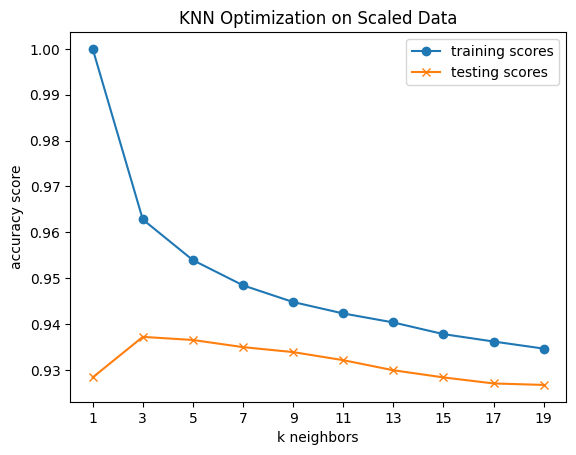

In [43]:
# knn scaled
knn_optimization(X_train_scaled, X_test_scaled, 
                 y_train_encoded,y_test_encoded, 
                 'Scaled')

In [27]:
# random forest, scaled
rf_optimization(X_train_scaled, X_test_scaled, 
                y_train_encoded, y_test_encoded, 
                'scaled')

4 estimators, scaled data...
8 estimators, scaled data...
16 estimators, scaled data...
32 estimators, scaled data...
64 estimators, scaled data...
128 estimators, scaled data...
256 estimators, scaled data...
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14731
           1       0.96      0.93      0.95      4747
           2       0.99      1.00      1.00      5522

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.97     25000
weighted avg       0.98      0.98      0.98     25000

[[14528   161    42]
 [  346  4401     0]
 [    4     0  5518]]


,4,8,16,32,64,128,256
3,"(0.74087, 0.73456, 0.006)","(0.77679, 0.7738, 0.003)","(0.87484, 0.87532, -0.0)","(0.93701, 0.93472, 0.002)","(0.94035, 0.93904, 0.001)","(0.93871, 0.9378, 0.001)","(0.93797, 0.93736, 0.001)"
9,"(0.95944, 0.95392, 0.006)","(0.97293, 0.96788, 0.005)","(0.97659, 0.97252, 0.004)","(0.97791, 0.9736, 0.004)","(0.97784, 0.97328, 0.005)","(0.97756, 0.9734, 0.004)","(0.97804, 0.97364, 0.004)"
27,"(0.99301, 0.96756, 0.025)","(0.99697, 0.97392, 0.023)","(0.99885, 0.97608, 0.023)","(0.99957, 0.97736, 0.022)","(0.99988, 0.97776, 0.022)","(1.0, 0.97772, 0.022)","(1.0, 0.97796, 0.022)"
81,"(0.99331, 0.9686, 0.025)","(0.99693, 0.9726, 0.024)","(0.9988, 0.97568, 0.023)","(0.99961, 0.97732, 0.022)","(0.99993, 0.97744, 0.022)","(1.0, 0.97756, 0.022)","(1.0, 0.97788, 0.022)"


In [28]:


# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply the undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert back to a DataFrame 
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled["class"] = y_resampled

# Display the balanced class distribution
print(data_resampled["class"].value_counts())

class
GALAXY    18961
QSO       18961
STAR      18961
Name: count, dtype: int64


In [29]:
# encoding resampled y
y_resamp_encod = le.transform(y_resampled)

# new train test split for resampled data
X_train_resamp, X_test_resamp, y_train_resamp_encod, y_test_resamp_encod = train_test_split(X_resampled, y_resamp_encod, random_state=42)

Training/Test Score, k = 1 : 1.0/0.778004359749666
Training/Test Score, k = 3 : 0.8829872017251887/0.7799029604106603
Training/Test Score, k = 5 : 0.8451783788851905/0.7748400253146754
Training/Test Score, k = 7 : 0.827199849983592/0.7710428239926869
Training/Test Score, k = 9 : 0.8153860578500773/0.76998804584769
Training/Test Score, k = 11 : 0.8048614692231962/0.7642219253217073
Training/Test Score, k = 13 : 0.796258965824387/0.7602840869137192
Training/Test Score, k = 15 : 0.7888987858046974/0.7569087968497292
Training/Test Score, k = 17 : 0.7814448455299798/0.7521974544687434
Training/Test Score, k = 19 : 0.7756082696544935/0.749665986920751


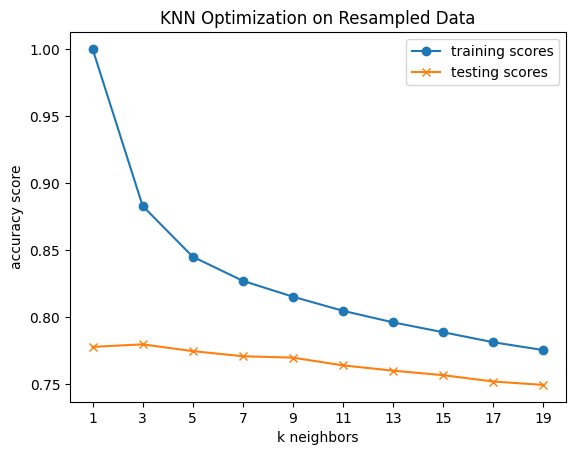

In [30]:
# knn, resampled
knn_optimization(X_train_resamp, X_test_resamp, 
                 y_train_resamp_encod, y_test_resamp_encod, 
                 'Resampled')

In [31]:
# random forest, resampled


rf_optimization(X_train_resamp, X_test_resamp, 
                y_train_resamp_encod, y_test_resamp_encod, 
                'resampled')

4 estimators, resampled data...
8 estimators, resampled data...
16 estimators, resampled data...
32 estimators, resampled data...
64 estimators, resampled data...
128 estimators, resampled data...
256 estimators, resampled data...
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4736
           1       0.98      0.95      0.96      4726
           2       0.99      1.00      1.00      4759

    accuracy                           0.97     14221
   macro avg       0.97      0.97      0.97     14221
weighted avg       0.97      0.97      0.97     14221

[[4586  114   36]
 [ 221 4504    1]
 [   0    0 4759]]


,4,8,16,32,64,128,256
3,"(0.75625, 0.75768, -0.001)","(0.89429, 0.89642, -0.002)","(0.93186, 0.93095, 0.001)","(0.93666, 0.93601, 0.001)","(0.93777, 0.93692, 0.001)","(0.93688, 0.93664, 0.0)","(0.93943, 0.94023, -0.001)"
9,"(0.96993, 0.96329, 0.007)","(0.97192, 0.96611, 0.006)","(0.97492, 0.97152, 0.003)","(0.97527, 0.97124, 0.004)","(0.97555, 0.97117, 0.004)","(0.97532, 0.97131, 0.004)","(0.97536, 0.97145, 0.004)"
27,"(0.9917, 0.96625, 0.025)","(0.99641, 0.97011, 0.026)","(0.99834, 0.973, 0.025)","(0.99953, 0.97398, 0.026)","(0.99988, 0.9737, 0.026)","(1.0, 0.9744, 0.026)","(1.0, 0.97377, 0.026)"
81,"(0.99147, 0.9647, 0.027)","(0.99644, 0.97103, 0.025)","(0.99848, 0.97251, 0.026)","(0.99948, 0.97363, 0.026)","(0.99988, 0.973, 0.027)","(1.0, 0.97412, 0.026)","(1.0, 0.97384, 0.026)"


In [32]:
# scaling the data
resamp_scaler = StandardScaler()
X_train_resamp_scaled = resamp_scaler.fit_transform(X_train_resamp)
X_test_resamp_scaled = resamp_scaler.transform(X_test_resamp)

Training/Test Score, k = 1 : 1.0/0.9245482033612263
Training/Test Score, k = 3 : 0.9602456518681731/0.9337599324941988
Training/Test Score, k = 5 : 0.9496038629225072/0.9320722874622038
Training/Test Score, k = 7 : 0.9440954479396184/0.9296111384572112
Training/Test Score, k = 9 : 0.9391964746144109/0.9275015821672175
Training/Test Score, k = 11 : 0.9359617458159486/0.925321707334224
Training/Test Score, k = 13 : 0.9326566968262153/0.9225089656142325
Training/Test Score, k = 15 : 0.9298204491116215/0.9222276914422333
Training/Test Score, k = 17 : 0.9276170831184661/0.9194852682652416
Training/Test Score, k = 19 : 0.9246636350850874/0.9169538007172492


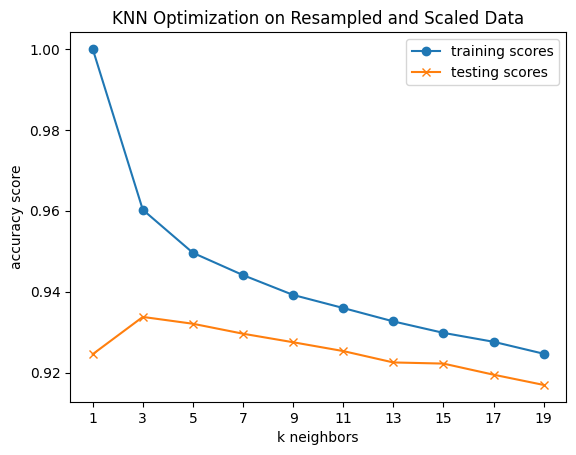

In [33]:
# knn, resample and scaled

knn_optimization(X_train_resamp_scaled, X_test_resamp_scaled, 
                 y_train_resamp_encod,y_test_resamp_encod,
                 'Resampled and Scaled')

In [34]:
# random forest, resample and scaled

rf_optimization(X_train_resamp_scaled, X_test_resamp_scaled, 
                y_train_resamp_encod,y_test_resamp_encod, 
                'resampled and scaled')

4 estimators, resampled and scaled data...
8 estimators, resampled and scaled data...
16 estimators, resampled and scaled data...
32 estimators, resampled and scaled data...
64 estimators, resampled and scaled data...
128 estimators, resampled and scaled data...
256 estimators, resampled and scaled data...
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4736
           1       0.98      0.95      0.96      4726
           2       0.99      1.00      1.00      4759

    accuracy                           0.97     14221
   macro avg       0.97      0.97      0.97     14221
weighted avg       0.97      0.97      0.97     14221

[[4585  115   36]
 [ 221 4504    1]
 [   0    0 4759]]


,4,8,16,32,64,128,256
3,"(0.75625, 0.75768, -0.001)","(0.89429, 0.89642, -0.002)","(0.93186, 0.93095, 0.001)","(0.93666, 0.93601, 0.001)","(0.93777, 0.93692, 0.001)","(0.93688, 0.93664, 0.0)","(0.93943, 0.94023, -0.001)"
9,"(0.96993, 0.96329, 0.007)","(0.97192, 0.96611, 0.006)","(0.97492, 0.97152, 0.003)","(0.97525, 0.97124, 0.004)","(0.97558, 0.97124, 0.004)","(0.9752, 0.97138, 0.004)","(0.97529, 0.97131, 0.004)"
27,"(0.9917, 0.96625, 0.025)","(0.99641, 0.97011, 0.026)","(0.99841, 0.97314, 0.025)","(0.99955, 0.97342, 0.026)","(0.99988, 0.97342, 0.026)","(1.0, 0.9744, 0.026)","(1.0, 0.97412, 0.026)"
81,"(0.99147, 0.9647, 0.027)","(0.99644, 0.97103, 0.025)","(0.99848, 0.97244, 0.026)","(0.99951, 0.97356, 0.026)","(0.99988, 0.97342, 0.026)","(1.0, 0.97412, 0.026)","(1.0, 0.97377, 0.026)"


In [41]:
# function to output final performance metrics
def performance_report(model, X_test, y_test):
    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap=plt.cm.Blues)  
    plt.title("Confusion Matrix")
    plt.show()

    # print("Confusion Matrix:")
    # print(conf_matrix)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

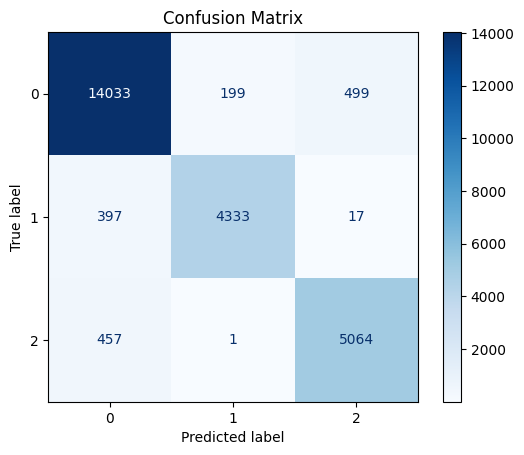

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14731
           1       0.96      0.91      0.93      4747
           2       0.91      0.92      0.91      5522

    accuracy                           0.94     25000
   macro avg       0.94      0.93      0.93     25000
weighted avg       0.94      0.94      0.94     25000



In [42]:
# final optimized knn model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train_encoded)

performance_report(knn_model,X_test_scaled,y_test_encoded)


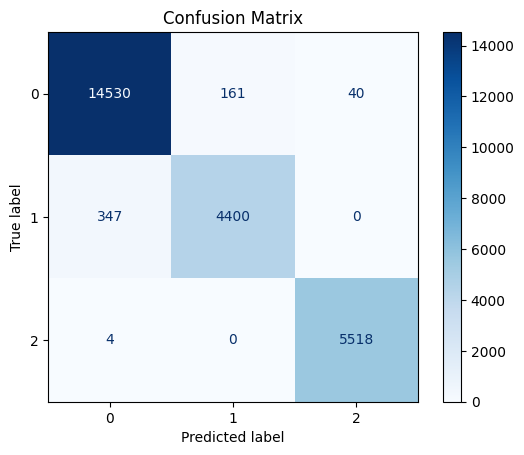

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14731
           1       0.96      0.93      0.95      4747
           2       0.99      1.00      1.00      5522

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.97     25000
weighted avg       0.98      0.98      0.98     25000



In [44]:
# final optimized random forest model
rf_model = RandomForestClassifier(random_state=111, max_depth=81, n_estimators=256)
rf_model.fit(X_train, y_train_encoded)
performance_report(rf_model, X_test, y_test_encoded)

In [45]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.6184655933919659, 'redshift'),
 (0.09930016079249342, 'z'),
 (0.07633022591975211, 'g'),
 (0.06658676136994217, 'i'),
 (0.06411116350210502, 'u'),
 (0.04658819037302452, 'r'),
 (0.014505705925512567, 'delta'),
 (0.01411219872520414, 'alpha')]